# Introduction
This notebook walks through the entire process of building a regression model, starting from data loading and exploration, through preprocessing, to model development and evaluation. 
It utilizes a dataset containing various features and attributes of residential homes in Ames, Iowa, USA. The dataset includes 79 features that describe different aspects of residential properties, consisting of both categorical and numerical variables. The target variable is SalePrice, which represents the selling price of a property. 

The goal is to analyze the factors influencing house prices and build a predictive model that can estimate property values based on key characteristics.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, shapiro, f_oneway
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
seed = 42

In [2]:
#importing the data
train_data_path = '/kaggle/input/house-prices-advanced-regression-techniques/train.csv'
#test_data_path = '/kaggle/input/house-prices-advanced-regression-techniques/test.csv'
train_df = pd.read_csv(train_data_path)
#test_df = pd.read_csv(test_data_path)
print(f"Dataset has {train_df.shape[1]} columns and {train_df.shape[0]} rows.")
train_df.head()

Dataset has 81 columns and 1460 rows.


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

The dataset contains an Id column, which is not useful for analysis and modeling. Therefore, we can remove it right away.

In [4]:
#dropping 'Id' column
train_df = train_df.drop(['Id'], axis = 1)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
numerical_cols = [col for col in train_df.columns if train_df.dtypes[col] != 'object']
numerical_cols.remove('SalePrice')
categorical_cols = [col for col in train_df.columns if train_df.dtypes[col] == 'object']

#despite its numerical values, according to definition in data_description.txt, MSSubClass feature is a categorical feature
numerical_cols.remove('MSSubClass')
categorical_cols = categorical_cols + ['MSSubClass']

#casting all categorical variables as 'object' datatype
train_df[categorical_cols] = train_df[categorical_cols].astype('object')

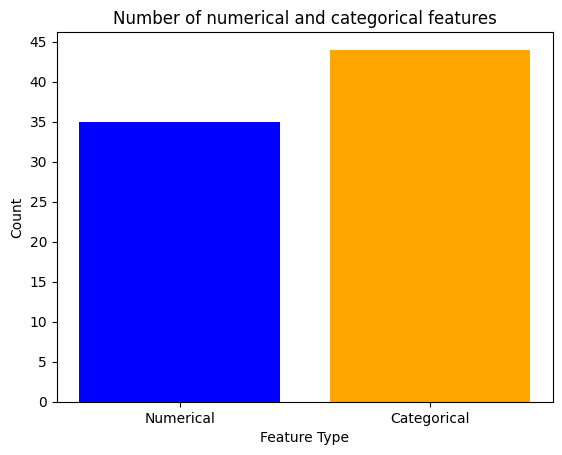

In [7]:
plt.bar(['Numerical', 'Categorical'], [len(numerical_cols), len(categorical_cols)], color = ['blue', 'orange'])
plt.xlabel('Feature Type')
plt.ylabel('Count')
plt.title('Number of numerical and categorical features')
plt.yticks(np.arange(0, 50, 5))
plt.show()

In [8]:
print(f"The dataset consists of {len(numerical_cols)} numerical features, excluding the target variable, and {len(categorical_cols)} categorical features.")

The dataset consists of 35 numerical features, excluding the target variable, and 44 categorical features.


# Missing values

In [9]:
#missing values
def missing_values_summary(df):
    missing_count = df.isnull().sum()  #number of missing values
    missing_percentage = (missing_count / len(df)) * 100  # percentage of missing values

    missing_df = pd.DataFrame({'Missing Values': missing_count, 'Percentage': missing_percentage})
    missing_df = missing_df[missing_df['Missing Values'] > 0] 
    missing_df = missing_df.sort_values(by='Missing Values', ascending=False)
    
    return missing_df

In [10]:
missing_values = missing_values_summary(train_df)
missing_values

,Missing Values,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


In [11]:
def plot_missing_values(df):
    missing_summary = missing_values_summary(df)
    
    plt.figure(figsize=(10, 6))
    missing_summary['Percentage'].plot(kind='bar', color='blue')
    plt.xlabel('Columns')
    plt.ylabel('Missing Values Percentage')
    plt.title('% of Missing Values per Column')
    plt.yticks(np.arange(0, 105, 5))
    plt.show()

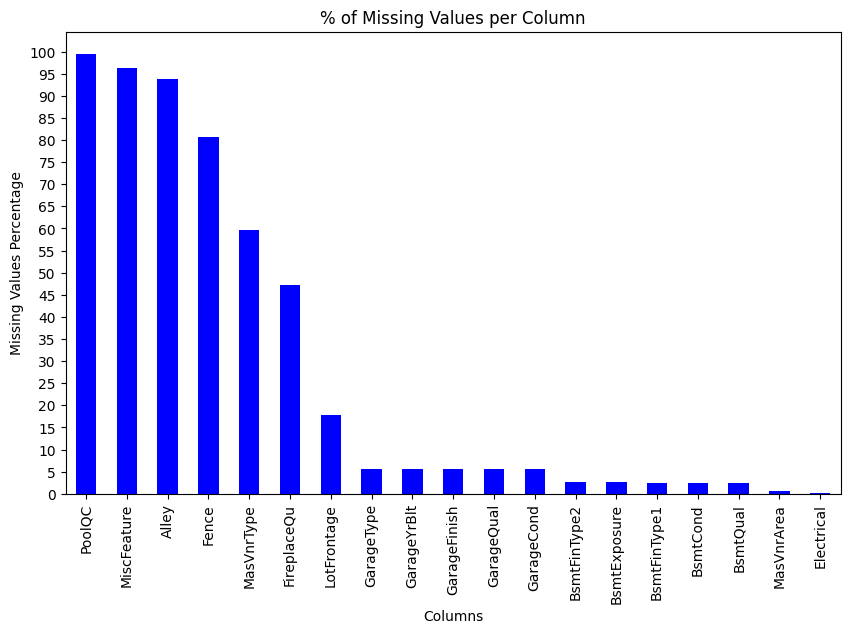

In [12]:
plot_missing_values(train_df)

We have many missing values, but are they truly missing data? According to the dataset description, missing values in columns such as Alley, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MasVnrType and MiscFeature do not indicate a lack of information but rather the absence of a particular feature (e.g., no pool or no garage). Therefore, we can replace these missing values with 'None' to accurately reflect the data.

But does NaN in these columns always indicate the absence of a given feature? This can be verified by referring to other columns that contain information about the same feature – for example, by checking the unique values of MasVnrArea for rows where MasVnrType is missing. If values other than NaN and 0 appear, we know that MasVnrType also contains missing values that result from a lack of information rather than the absence of the feature itself.

In [13]:
#these columns are not true missing data
#train_df[train_df['BsmtQual'].isna()]['BsmtFinType1'].unique() #ok
#train_df[train_df['BsmtQual'].isna()]['BsmtFinType2'].unique() #ok
#train_df[train_df['GarageType'].isna()]['GarageFinish'].unique() #ok
#train_df[train_df['GarageType'].isna()]['GarageQual'].unique() #ok
#train_df[train_df['GarageType'].isna()]['GarageCond'].unique() # ok
#train_df[train_df['FireplaceQu'].isna()]['Fireplaces'].unique() # ok
#train_df[train_df['PoolQC'].isna()]['PoolArea'].unique() #ok
#train_df[train_df['MiscFeature'].isna()]['MiscVal'].unique() #ok
#train_df[train_df['BsmtQual'].isna()]['BsmtCond'].unique() #ok

#'MasVnrType' is a candidate for having missing values
train_df[train_df['MasVnrType'].isna()]['MasVnrArea'].unique()

array([  0.,  nan, 288.,   1., 344., 312.])

In [14]:
train_df[(train_df['MasVnrArea'] > 0) & (train_df['MasVnrType'].isna())]  #5 examples of missing MasVnrType

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
624,60,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,6,5,1972,1972,Gable,CompShg,VinylSd,VinylSd,NaN,288.0,TA,TA,CBlock,TA,TA,No,Rec,247,Unf,0,485,732,GasA,Gd,Y,SBrkr,1012,778,0,1790,1,0,1,2,4,1,TA,8,Min2,1,TA,Attchd,1972.0,RFn,2,484,TA,TA,Y,148,0,0,0,147,0,NaN,NaN,NaN,0,11,2006,WD,Normal,165150
773,20,RL,70.0,10150,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,5,1958,1958,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,1.0,TA,TA,CBlock,TA,TA,No,Rec,456,Unf,0,456,912,GasA,Ex,Y,FuseA,912,0,0,912,0,0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1958.0,RFn,1,275,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,COD,Normal,114500
1230,90,RL,NaN,18890,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,RRAe,Duplex,1.5Fin,5,5,1977,1977,Shed,CompShg,Plywood,Plywood,NaN,1.0,TA,TA,CBlock,Gd,TA,No,GLQ,498,Rec,211,652,1361,GasA,Ex,Y,SBrkr,1361,1259,0,2620,0,0,2,2,4,2,TA,12,Typ,1,TA,BuiltIn,1977.0,RFn,2,600,TA,TA,N,155,24,145,0,0,0,NaN,NaN,Gar2,8300,8,2007,WD,Normal,190000
1300,60,RL,NaN,10762,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,NaN,344.0,Gd,TA,PConc,Gd,TA,No,GLQ,694,Unf,0,284,978,GasA,Ex,Y,SBrkr,1005,978,0,1983,0,0,2,1,3,1,Gd,9,Typ,1,TA,Attchd,1999.0,Fin,2,490,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,225000
1334,160,RM,24.0,2368,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,TwnhsE,2Story,5,6,1970,1970,Gable,CompShg,HdBoard,HdBoard,NaN,312.0,TA,TA,CBlock,TA,TA,No,LwQ,765,Unf,0,0,765,GasA,TA,Y,SBrkr,765,600,0,1365,0,0,1,1,3,1,TA,7,Min1,0,NaN,Attchd,1970.0,Unf,2,440,TA,TA,Y,0,36,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,125000


In [15]:
train_df[train_df['MasVnrArea'].isnull()] #8 examples of missing MasVnrArea

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
529,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
650,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
936,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,Ex,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2003.0,RFn,2,555,TA,TA,Y,0,41,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
973,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,GasA,Ex,Y,SBrkr,1428,0,0,1428,0,0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2007.0,Fin,2,480,TA,TA,Y,0,120,0,0,0,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
977,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,0,135,1241,GasA,Ex,Y,SBrkr,1241,0,0,1241,1,0,1,1,1,1,Gd,4,Typ,0,NaN,Attchd,2007.0,Fin,2,569,TA,TA,Y,0,116,0,0,0,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900
1243,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,0,690,2076,GasA,Ex,Y,SBrkr,2076,0,0,2076,1,0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3,850,TA,TA,Y,216,229,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
1278,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804,Unf,0,324,1128,GasA,Ex,Y,SBrkr,1128,903,0,2031,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2,577,TA,TA,Y,0,211,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000


Let's check how the lack of a feature affects the house price compared to the average price when the feature is present.

In [16]:
def plot_missing_value_impact(df, target_col, feature_columns):
    df = df.copy()
    melted_data = []

    for col in feature_columns:
        temp_df = df[[col, target_col]].copy()
        temp_df['feature_status'] = np.where(temp_df[col].isnull(), 'Missing', 'Present')
        temp_df['feature'] = col
        melted_data.append(temp_df[[target_col, 'feature_status', 'feature']])

    plot_df = pd.concat(melted_data, axis=0)

    #number of subplots
    n_cols = 3  #number of columns in subplots
    n_rows = (len(feature_columns) + n_cols - 1) // n_cols  #number of rows in subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))

   
    for i, col in enumerate(feature_columns):
        ax = axes.flat[i]
        temp_df = plot_df[plot_df["feature"] == col]
        
        sns.barplot(
            x="feature_status",
            y=target_col,
            data=temp_df,
            order=["Present", "Missing"],
            palette={"Missing": "orange", "Present": "blue"},
            ax=ax,
            ci="sd"
        )

        #setting labels
        ax.set_xlabel('')
        ax.set_ylabel(f"Mean {target_col}")
        ax.set_title(f"{col} Impact")
        handles = [
            mpatches.Patch(color='blue', label='Present'),
            mpatches.Patch(color='orange', label='Missing')
        ]
        ax.legend(handles=handles, title="Feature Status", loc='upper right')


    for j in range(i + 1, n_rows * n_cols):
        fig.delaxes(axes.flat[j])

    plt.tight_layout()
    plt.show()

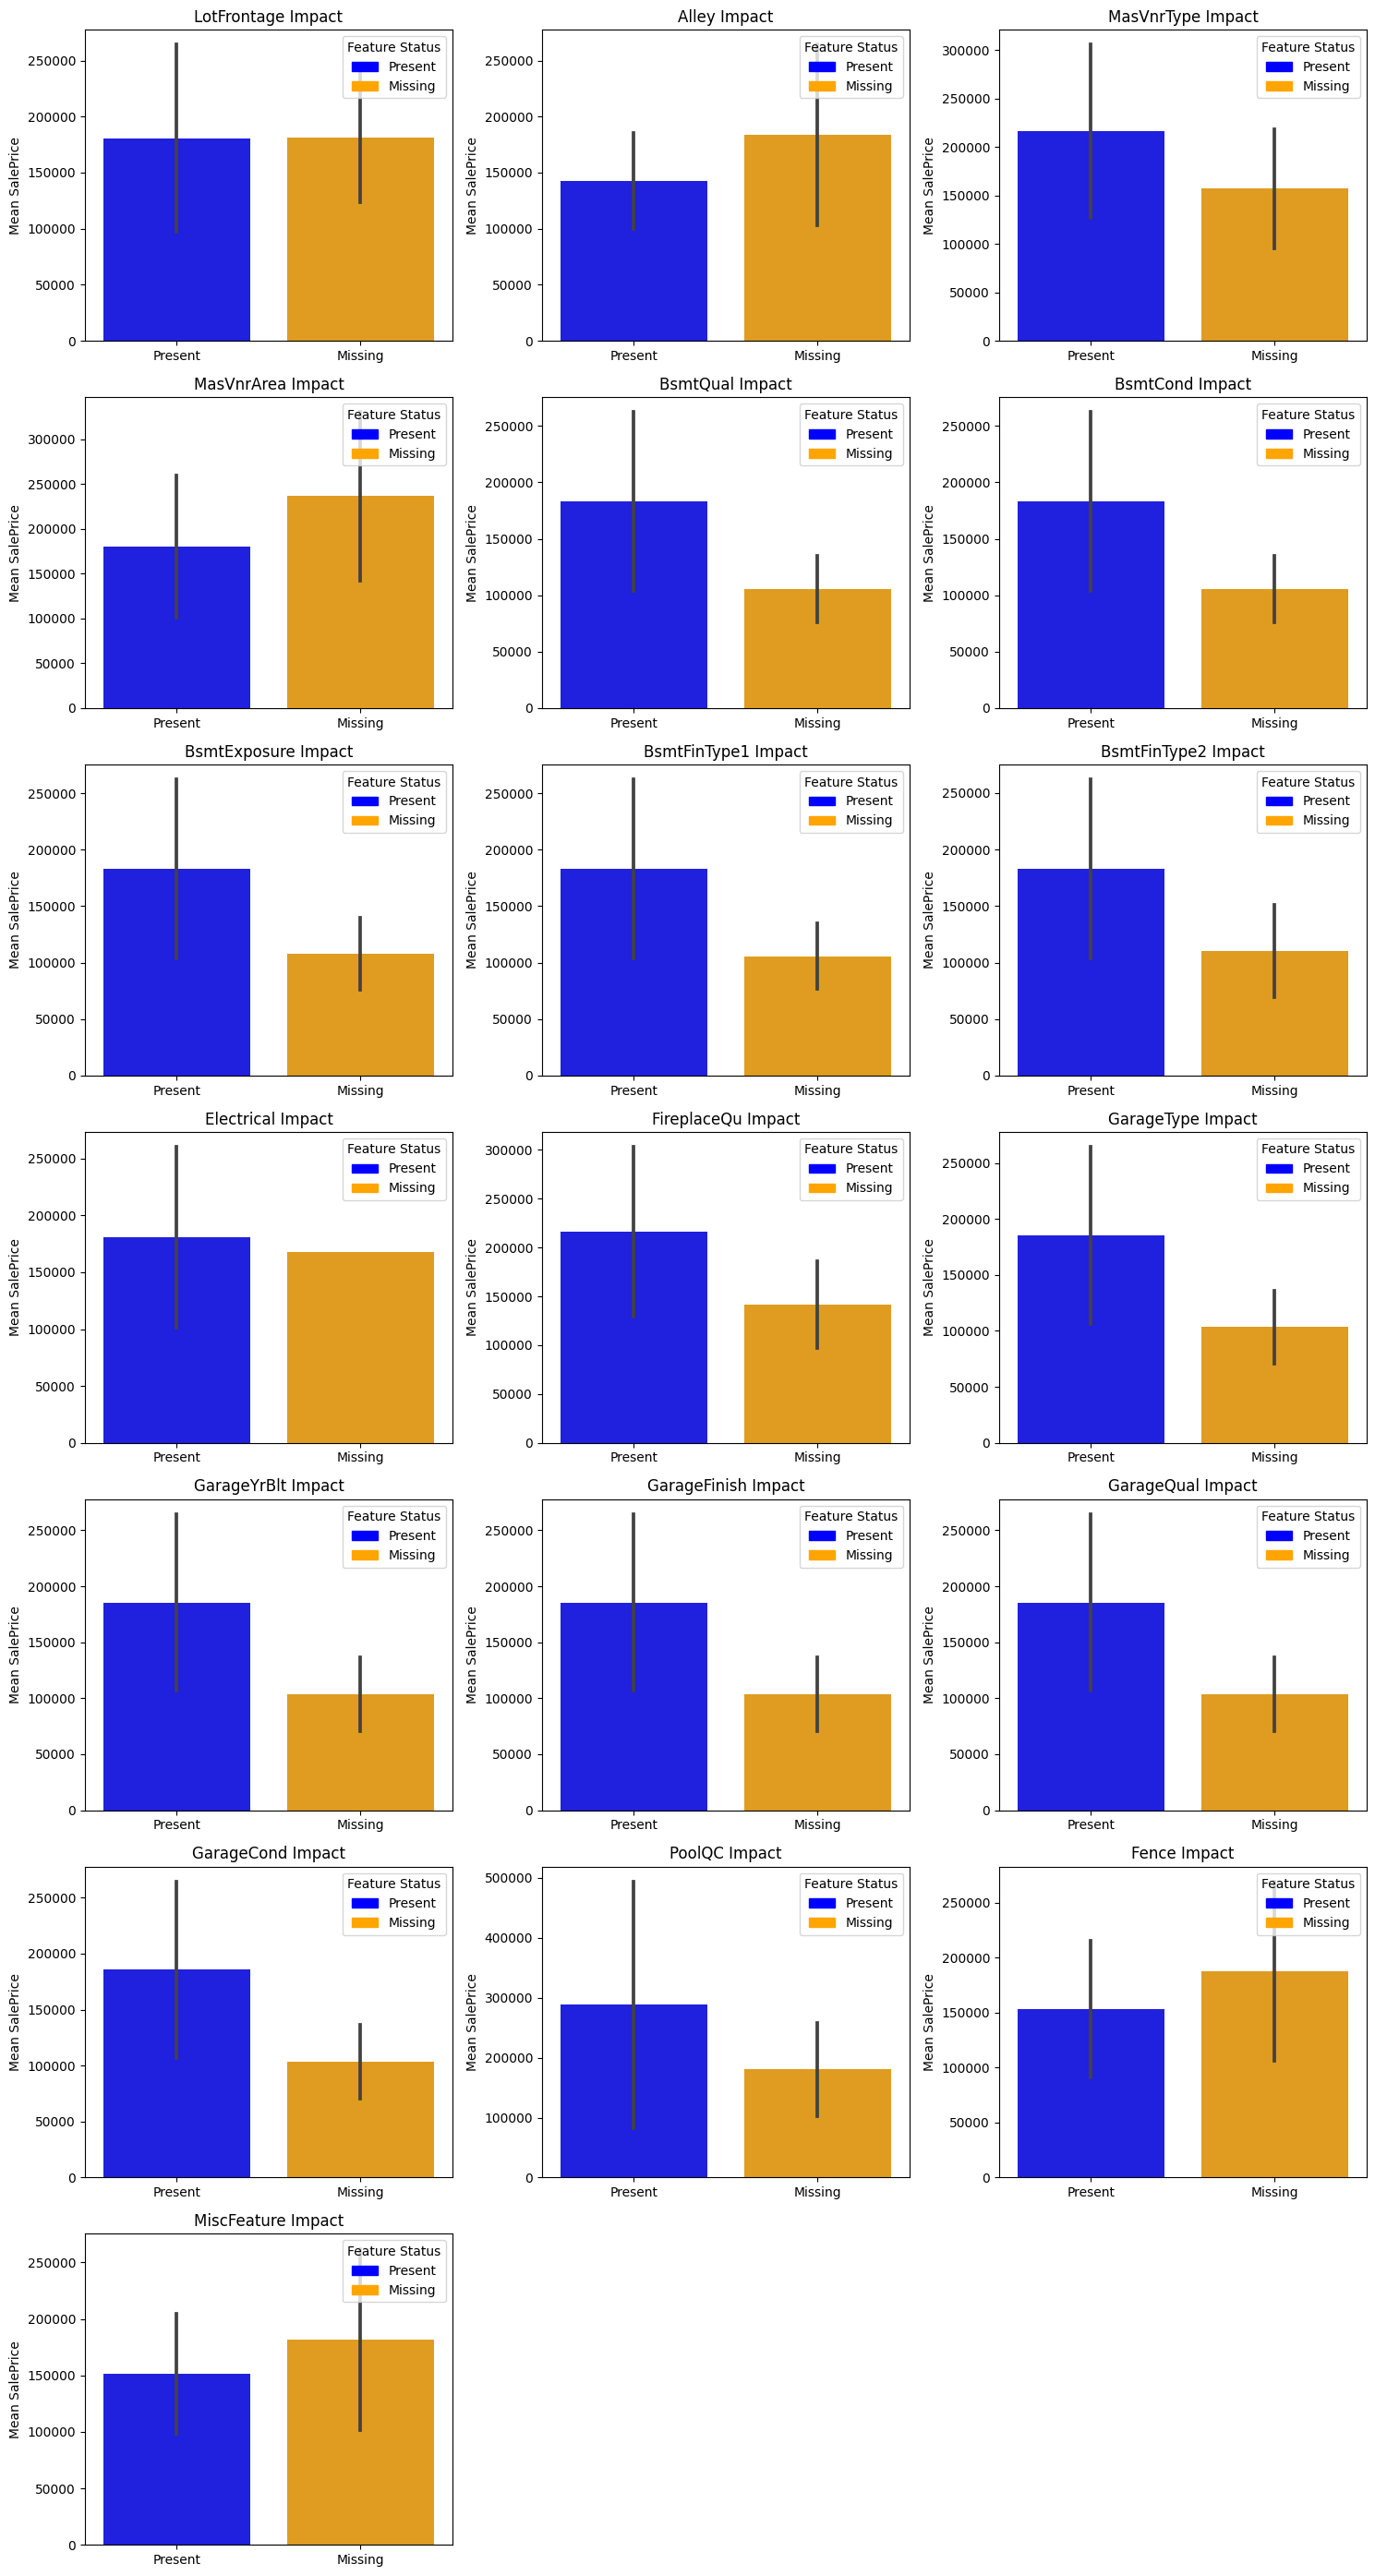

In [17]:
cols_with_missing = [col for col in train_df.columns if train_df[col].isnull().sum() > 0]
plot_missing_value_impact(train_df, 'SalePrice', cols_with_missing)

In [18]:
#t-test function
def ttest_missing_value_impact(df, target_col, feature_columns, alpha = 0.05):
    """
    Performs t-test for columns with missing values, comparing prices for rows where the feature is present and where the feature is absent.

    Parameters:
    df: pandas DataFrame
    target_col: Target column ('SalePrice')
    feature_cols: list of columns for testing
    alpha: significance level (0.05 by default)

    Returns:
    DataFrame with test results
    
    """
    results = []
    for col in cols_to_test:
        if col in train_df.columns and train_df[col].isna().sum() > 0:
            #SalePrice for records where a feature is present
            feature_present = train_df[train_df[col].notna()]['SalePrice']
            #SalePrice for records where a feature is absent
            feature_absent = train_df[train_df[col].isna()]['SalePrice']

            if len(feature_present) > 0 and len(feature_absent) > 0:
                #perform Welch's t-test, which does not assume equal population variance
                t_stat, p_val = ttest_ind(feature_absent, feature_present, equal_var = False)

                #store the results
                results.append({
                    'Feature': col,
                    'P-value': p_val,
                    'T-statistic': t_stat,
                    'Mean (without feature)': feature_absent.mean(),
                    'Mean (with feature)': feature_present.mean(),
                    'Significant': p_val < alpha
                })
    result_df = pd.DataFrame(results).sort_values(by='P-value').reset_index(drop = True)
    result_df = result_df.style.format({
        'P-value': "{:.2e}",
        'T-statistic': "{:.2f}",
        'Mean (without feature)': "{:.2f}",
        'Mean (with feature)': "{:.2f}"
    })
    return result_df
    

In [19]:
#list of columns to test
cols_to_test = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 
                'MasVnrType', 'Electrical', 'GarageYrBlt', 'LotFrontage']

#performing t-test
ttest_results = ttest_missing_value_impact(train_df, 'SalePrice', cols_to_test)
ttest_results

,Feature,P-value,T-statistic,Mean (without feature),Mean (with feature),Significant
0,FireplaceQu,4.67e-84,-21.11,141331.48,216397.69,True
1,GarageFinish,5.26e-42,-19.46,103317.28,185479.51,True
2,GarageType,5.26e-42,-19.46,103317.28,185479.51,True
3,GarageYrBlt,5.26e-42,-19.46,103317.28,185479.51,True
4,GarageQual,5.26e-42,-19.46,103317.28,185479.51,True
5,GarageCond,5.26e-42,-19.46,103317.28,185479.51,True
6,MasVnrType,4.92e-41,-14.08,156958.24,216458.09,True
7,BsmtQual,5.59e-20,-14.70,105652.89,182878.28,True
8,BsmtCond,5.59e-20,-14.70,105652.89,182878.28,True
9,BsmtFinType1,5.59e-20,-14.70,105652.89,182878.28,True


The bar plots show that in a significant number of cases, the absence of a feature had an impact on the average SalePrice.
Thanks to the t-test, we know that the absence of a feature in the columns 'PoolQC', 'LotFrontage', and 'Electrical' does not have a statistically significant impact on the average 'SalePrice', while the absence of a feature in the remaining columns does significantly affect the average 'SalePrice'. We can proceed to fill the missing values according to data description.

In [20]:
cols_to_replace = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                   'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                   'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

train_df[cols_to_replace] = train_df[cols_to_replace].fillna('None')

#Handling missing values in 'MasVnrType' and 'MasVnrArea'
train_df.loc[(train_df['MasVnrArea'] < 1) | (train_df['MasVnrArea'].isna()), 'MasVnrType'] = train_df.loc[(train_df['MasVnrArea'] < 1) | (train_df['MasVnrArea'].isna()), 'MasVnrType'].fillna('None')
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(0)

Let's check missing values after replacing not real NaNs with 'None'

In [21]:
print(missing_values_summary(train_df))

             Missing Values  Percentage
LotFrontage             259   17.739726
GarageYrBlt              81    5.547945
MasVnrType                5    0.342466
Electrical                1    0.068493


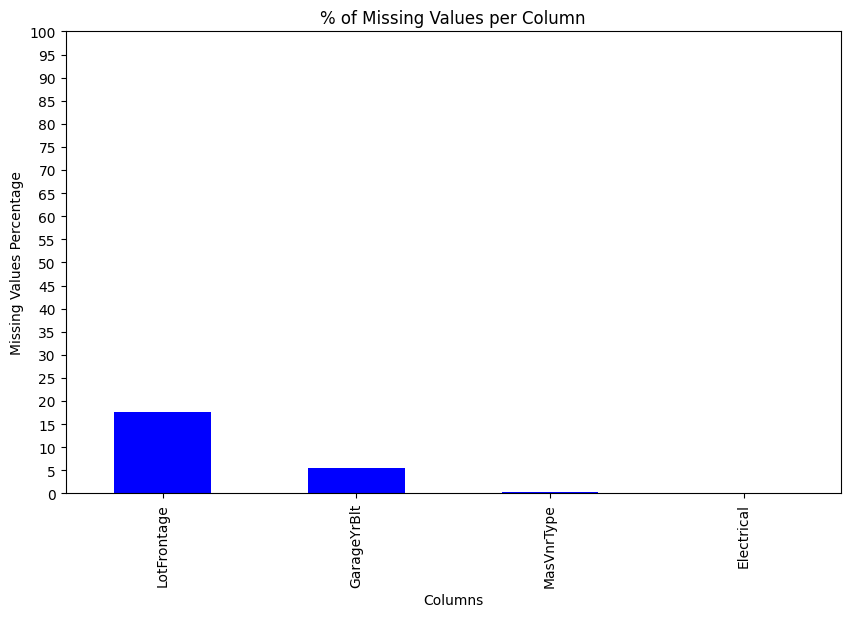

In [22]:
plot_missing_values(train_df)

In [23]:
train_df[train_df['MasVnrType'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
624,60,RL,80.0,10400,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,6,5,1972,1972,Gable,CompShg,VinylSd,VinylSd,NaN,288.0,TA,TA,CBlock,TA,TA,No,Rec,247,Unf,0,485,732,GasA,Gd,Y,SBrkr,1012,778,0,1790,1,0,1,2,4,1,TA,8,Min2,1,TA,Attchd,1972.0,RFn,2,484,TA,TA,Y,148,0,0,0,147,0,None,None,None,0,11,2006,WD,Normal,165150
773,20,RL,70.0,10150,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,5,1958,1958,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,1.0,TA,TA,CBlock,TA,TA,No,Rec,456,Unf,0,456,912,GasA,Ex,Y,FuseA,912,0,0,912,0,0,1,0,2,1,TA,5,Typ,0,None,Attchd,1958.0,RFn,1,275,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,7,2007,COD,Normal,114500
1230,90,RL,NaN,18890,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,RRAe,Duplex,1.5Fin,5,5,1977,1977,Shed,CompShg,Plywood,Plywood,NaN,1.0,TA,TA,CBlock,Gd,TA,No,GLQ,498,Rec,211,652,1361,GasA,Ex,Y,SBrkr,1361,1259,0,2620,0,0,2,2,4,2,TA,12,Typ,1,TA,BuiltIn,1977.0,RFn,2,600,TA,TA,N,155,24,145,0,0,0,None,None,Gar2,8300,8,2007,WD,Normal,190000
1300,60,RL,NaN,10762,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,NaN,344.0,Gd,TA,PConc,Gd,TA,No,GLQ,694,Unf,0,284,978,GasA,Ex,Y,SBrkr,1005,978,0,1983,0,0,2,1,3,1,Gd,9,Typ,1,TA,Attchd,1999.0,Fin,2,490,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,5,2009,WD,Normal,225000
1334,160,RM,24.0,2368,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,TwnhsE,2Story,5,6,1970,1970,Gable,CompShg,HdBoard,HdBoard,NaN,312.0,TA,TA,CBlock,TA,TA,No,LwQ,765,Unf,0,0,765,GasA,TA,Y,SBrkr,765,600,0,1365,0,0,1,1,3,1,TA,7,Min1,0,None,Attchd,1970.0,Unf,2,440,TA,TA,Y,0,36,0,0,0,0,None,None,None,0,5,2009,WD,Normal,125000


# 'SalePrice' Analysis

In [24]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Count'>

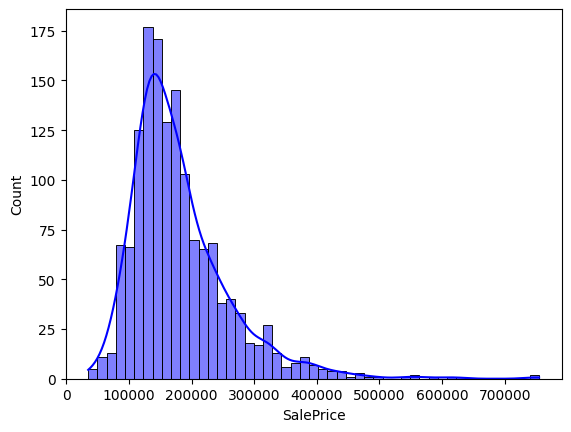

In [25]:
sns.histplot(train_df['SalePrice'], kde = True, color = 'b')

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

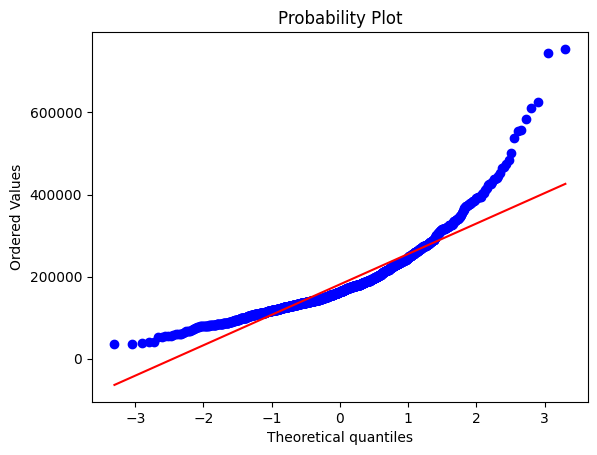

In [26]:
stats.probplot(train_df['SalePrice'], plot = plt)

In [27]:
print(f"Skewness: {train_df['SalePrice'].skew():.2f}")
print(f"Kurtosis: {train_df['SalePrice'].kurt():.2f}")

Skewness: 1.88
Kurtosis: 6.54


'SalePrice' is highly concentrated around it's mean and the distribution is not symmetrical, with a long tail on the right (most values are concentrated on the lower end, but there are significantly higher values that pull the distribution to the right), has sharper peak than normal distribution and heavier tails (more extreme values).

This means that the data will need to be transformed to follow a normal distribution before building the machine learning model.

In [28]:
print(numerical_cols)

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


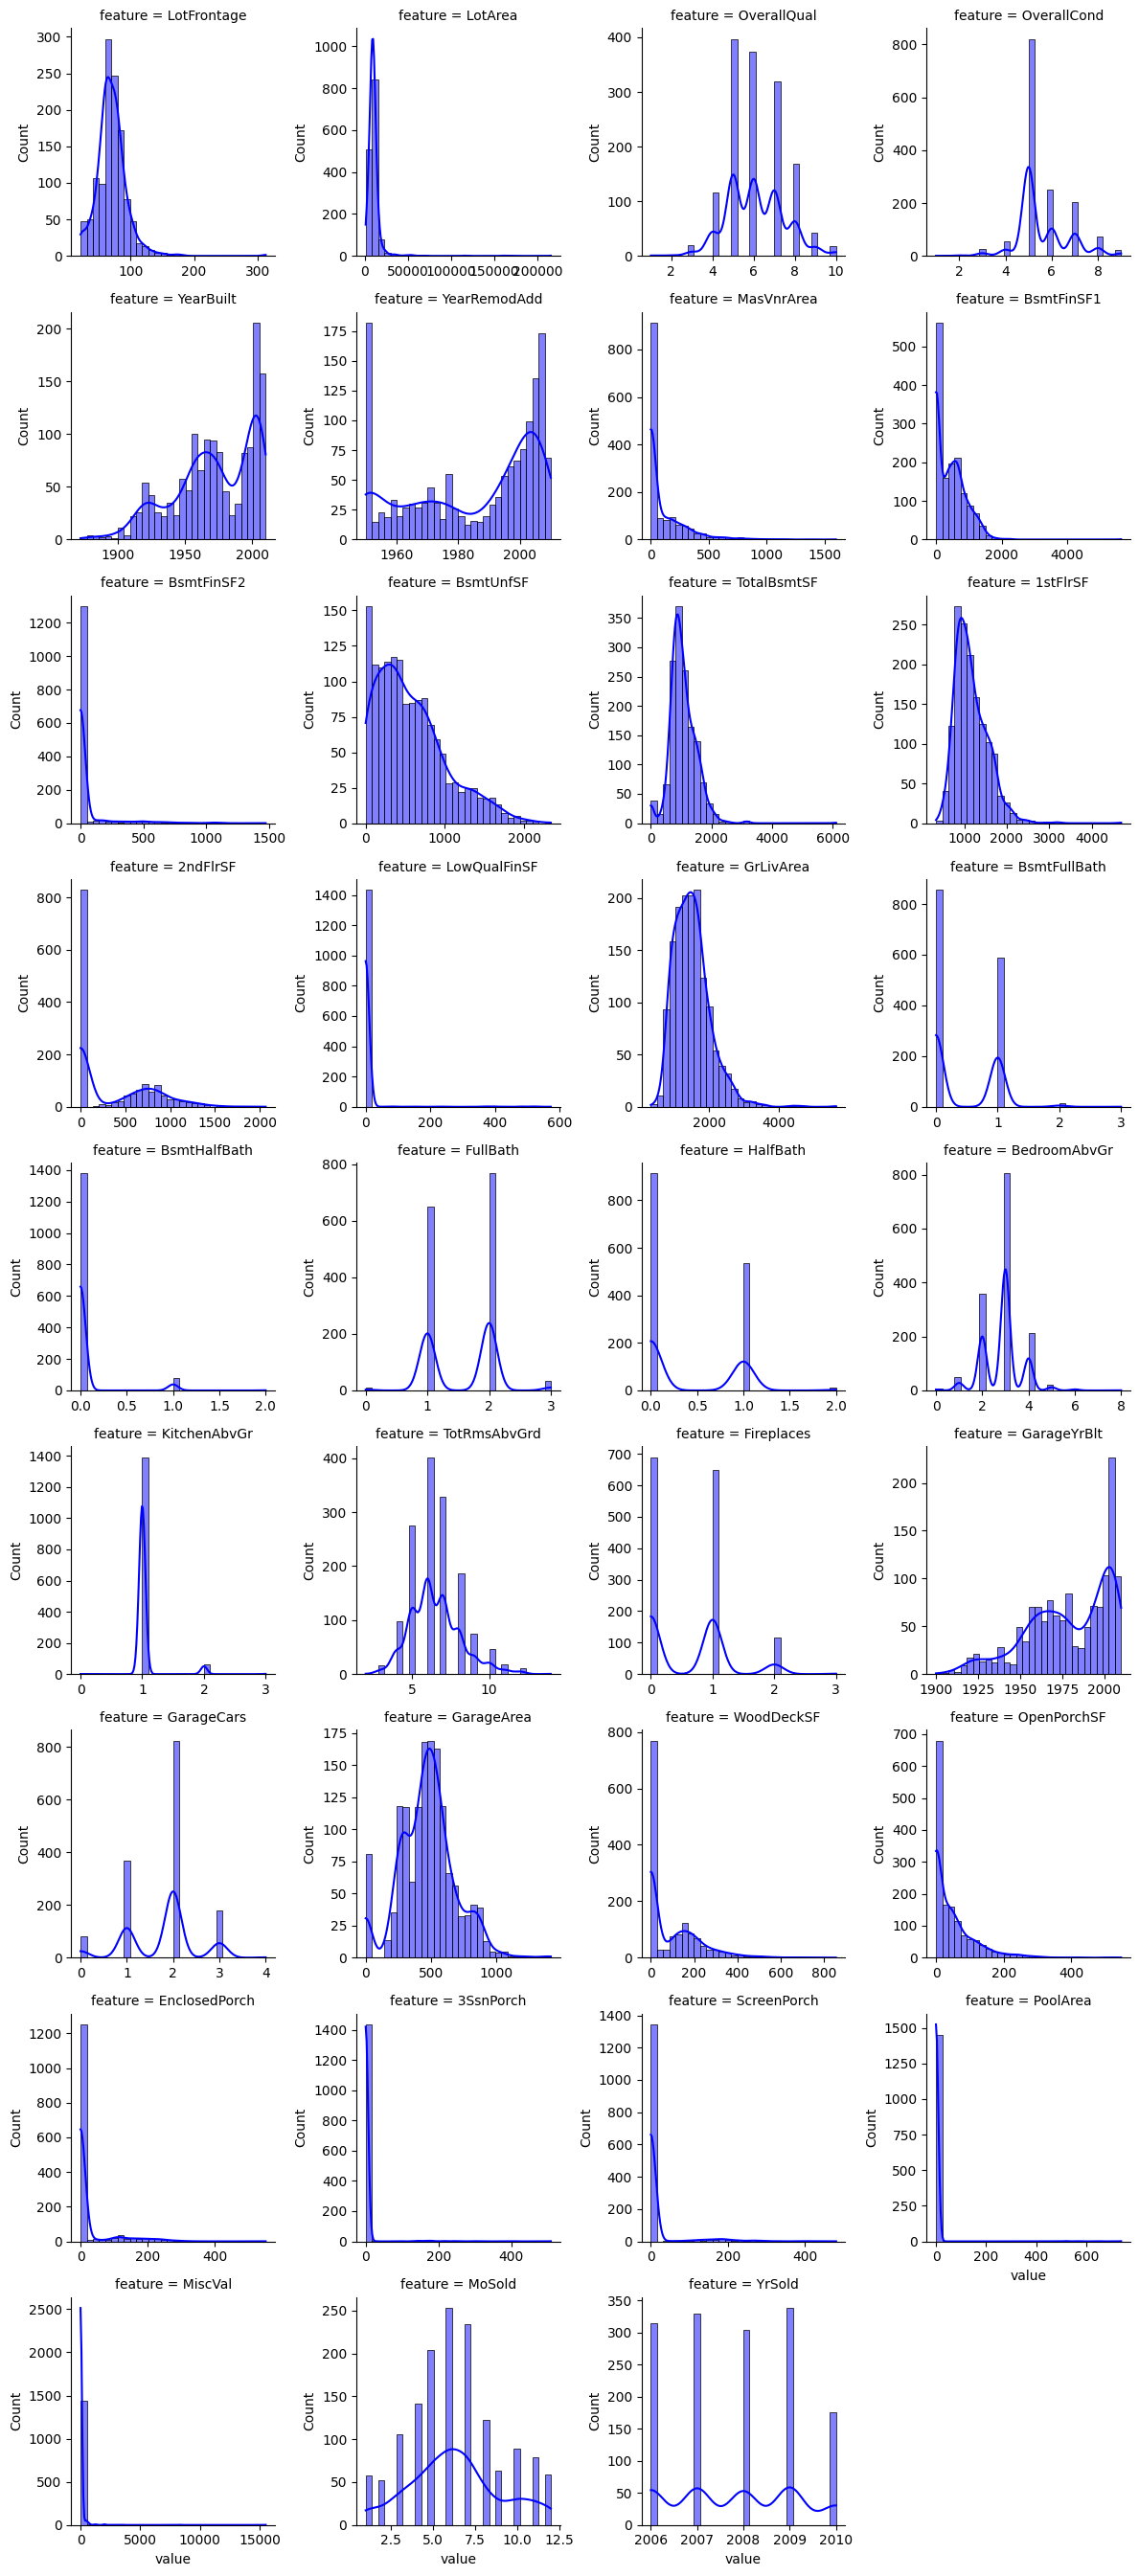

In [29]:
#transforming DataFrame into "long" format with 2 columns: feature and value
df_melted = train_df[numerical_cols].melt(var_name='feature', value_name='value') #transforming DataFrame into "long" format with 2 columns: feature and value

#creating FacetGrid
g = sns.FacetGrid(df_melted, col='feature', col_wrap=4, sharex=False, sharey=False, height=3)
g.map(sns.histplot, 'value', kde=True, bins=30, color='blue')

plt.show()

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([21., 21., 21., ..., nan, nan, nan])),
 (nan, nan, nan))

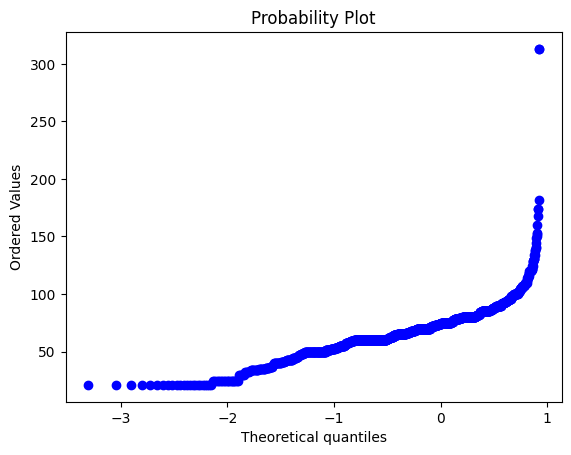

In [30]:
stats.probplot(train_df['LotFrontage'], plot = plt)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([   0,    0,    0, ..., 3200, 3206, 6110])),
 (420.2949602109553, 1057.4294520547944, 0.9564534567679274))

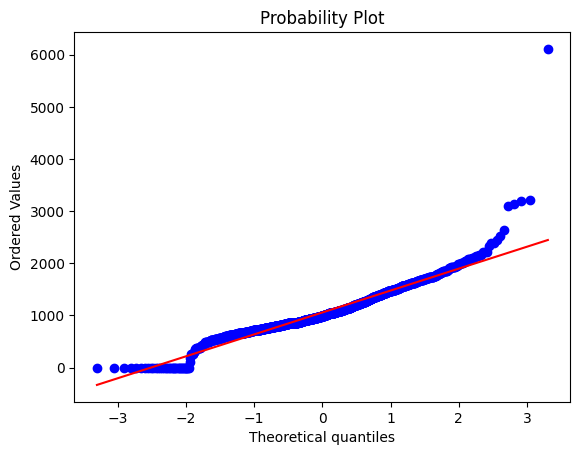

In [31]:
stats.probplot(train_df['TotalBsmtSF'], plot = plt)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 334,  372,  438, ..., 3138, 3228, 4692])),
 (372.48445992436774, 1162.626712328767, 0.9619281806000767))

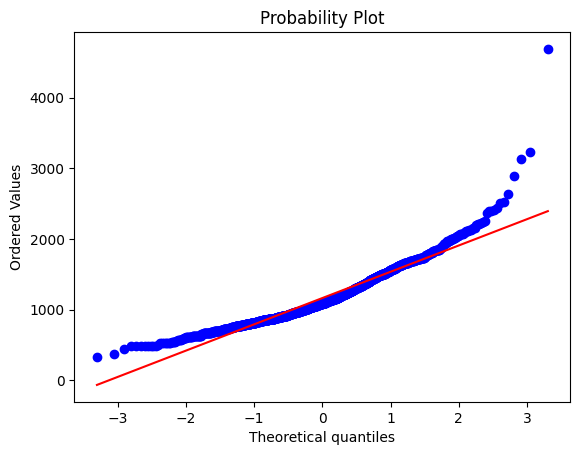

In [32]:
stats.probplot(train_df['1stFlrSF'], plot = plt)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 334,  438,  480, ..., 4476, 4676, 5642])),
 (506.68155082490534, 1515.463698630137, 0.9626338898809194))

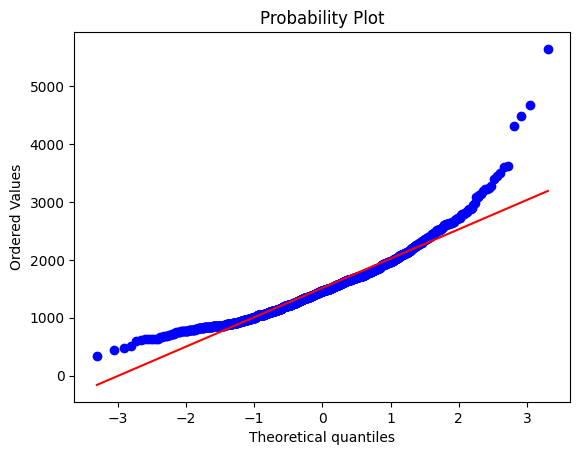

In [33]:
stats.probplot(train_df['GrLivArea'], plot = plt)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([   0,    0,    0, ..., 1356, 1390, 1418])),
 (211.49987133996856, 472.98013698630143, 0.9875864811659538))

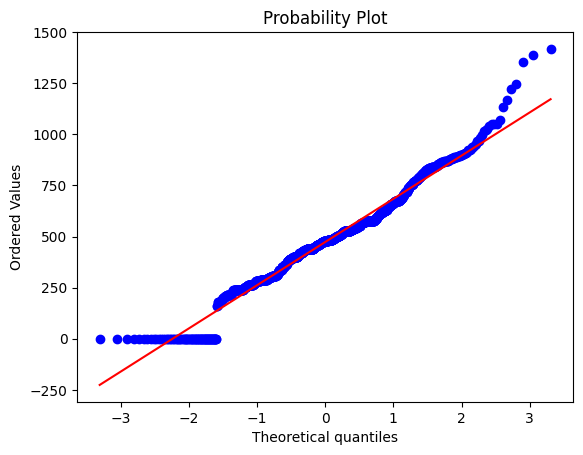

In [34]:
stats.probplot(train_df['GarageArea'], plot = plt)

The QQ plot shows noticeable deviations from the reference line, particularly in the tails. This pattern suggests that the data has heavier tails and is likely skewed, indicating a departure from normality.

In [35]:
# Shapiro-Wilk test function
def shapiro_normality_test(df, feature_columns, alpha = 0.05):
    """
    Performs Shapiro-Wilk test for normality on selected columns to check if the distribution is normal.

    Parameters:
    df: pandas DataFrame
    feature_columns: list of columns for testing
    alpha: significance level (0.05 by default)

    Returns:
    DataFrame with test results
    """
    results = []
    for col in feature_columns:
        if col in df.columns:
            #Extract the data for the feature column
            feature_data = df[col].dropna()  # Remove missing values
            
            if len(feature_data) > 0:
                #Perform Shapiro-Wilk test for normality
                stat, p_val = shapiro(feature_data)
                
                #Store the results
                results.append({
                    'Feature': col,
                    'P-value': p_val,
                    'Shapiro Statistic': stat,
                    'Normal Distribution': p_val >= alpha  # If p-value >= alpha, the distribution is normal
                })
    
    result_df = pd.DataFrame(results).sort_values(by='P-value').reset_index(drop=True)
    result_df = result_df.style.format({
        'P-value': "{:.2e}",
        'Shapiro Statistic': "{:.2f}"
    })
    return result_df

In [36]:
shapiro_test_results = shapiro_normality_test(train_df, numerical_cols)
shapiro_test_results

,Feature,P-value,Shapiro Statistic,Normal Distribution
0,PoolArea,7.11e-65,0.04,False
1,MiscVal,1.53e-64,0.06,False
2,3SsnPorch,8.31e-64,0.09,False
3,LowQualFinSF,9.59e-64,0.10,False
4,KitchenAbvGr,4.22e-61,0.22,False
5,BsmtHalfBath,1.47e-60,0.24,False
6,ScreenPorch,3.31e-59,0.30,False
7,BsmtFinSF2,1.85e-58,0.33,False
8,LotArea,7.93e-58,0.35,False
9,EnclosedPorch,4.85e-56,0.41,False


According to Shapiro-Wilk test, none of numerical features has normal distribution

# Time-related data

This dataset contains 4 year variables:
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
- GarageYrBlt: Year garage was built
- YrSold: Year Sold

In [37]:
year_data = [col for col in train_df.columns if 'Yr' in col or 'Year' in col]
print(year_data)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


Let's analyze relationship between them.

Text(0.5, 1.0, 'Year Sold vs Sale Price')

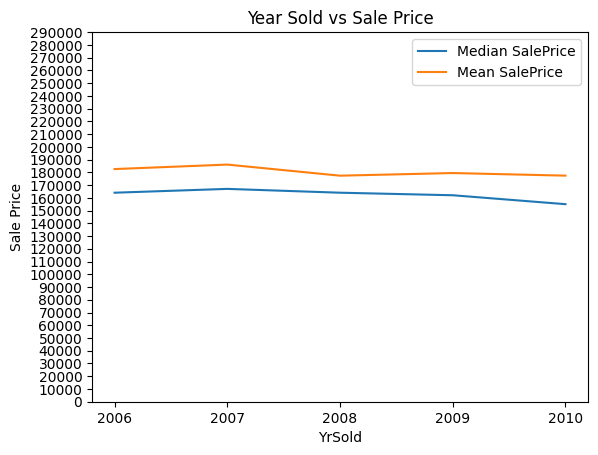

In [38]:
train_df.groupby('YrSold')['SalePrice'].median().plot(xticks = train_df['YrSold'].unique(), yticks = np.arange(0, 300000, 10000), label = 'Median SalePrice')
train_df.groupby('YrSold')['SalePrice'].mean().plot(xticks = train_df['YrSold'].unique(), yticks = np.arange(0, 300000, 10000), label = 'Mean SalePrice')
plt.ylabel('Sale Price')
plt.legend()
plt.title('Year Sold vs Sale Price')

Sale Prices are stable, with a slight decrease in 2010, which is quite unusual, as usually house prices go up as years go by.

Text(0.5, 1.0, 'Year Built vs Sale Price')

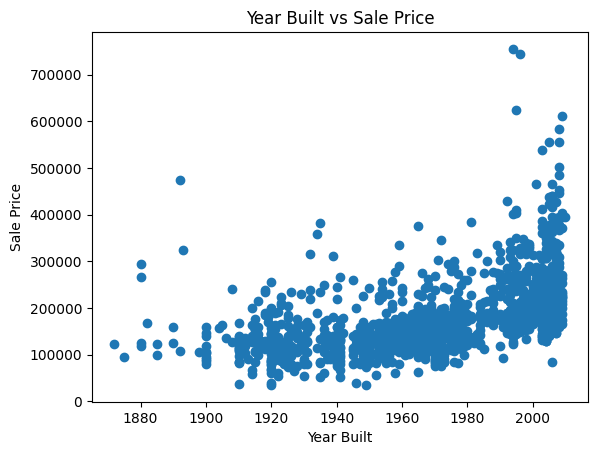

In [39]:
plt.scatter(train_df['YearBuilt'], train_df['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Year Built')
plt.title('Year Built vs Sale Price')

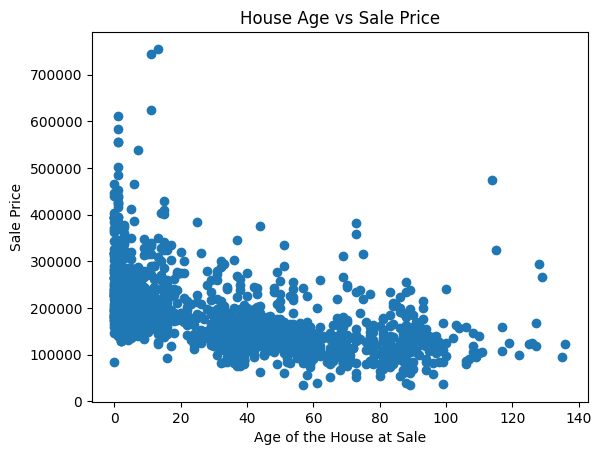

In [40]:
age = train_df['YrSold'] - train_df['YearBuilt']

plt.scatter(age, train_df['SalePrice'])
plt.xlabel('Age of the House at Sale')
plt.ylabel('Sale Price')
plt.title('House Age vs Sale Price')
plt.show()

We can see that in most cases, the newer the house, the higher the price.

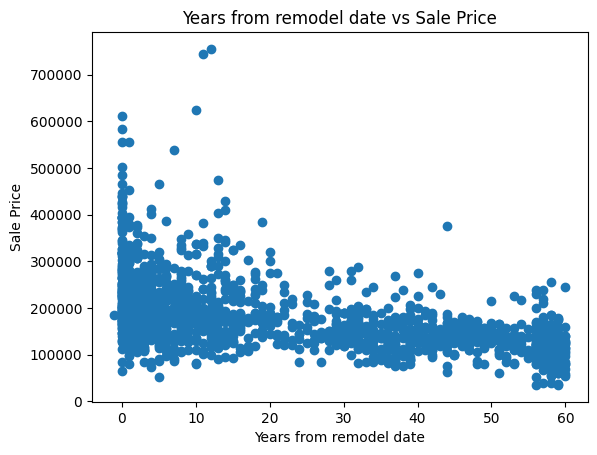

In [41]:
remod_age = train_df['YrSold'] - train_df['YearRemodAdd']

plt.scatter(remod_age, train_df['SalePrice'])
plt.xlabel('Years from remodel date')
plt.ylabel('Sale Price')
plt.title('Years from remodel date vs Sale Price')
plt.show()

Similarly, in most cases, the less time has passed since the remodeling, the higher the price.

Text(0.5, 1.0, 'House Year Built vs Garage Year Built')

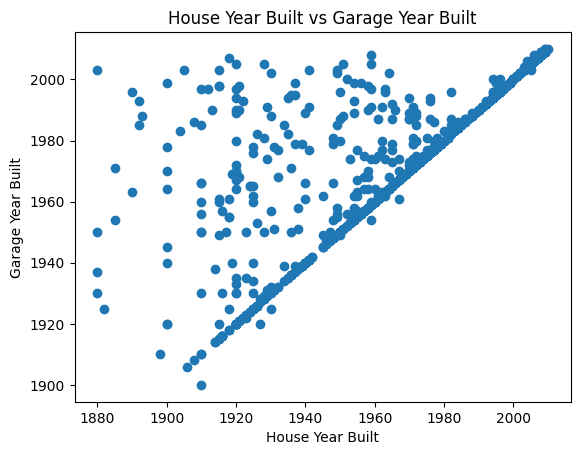

In [42]:
plt.scatter(train_df['YearBuilt'], train_df['GarageYrBlt'])
plt.ylabel('Garage Year Built')
plt.xlabel('House Year Built')
plt.title('House Year Built vs Garage Year Built')

Most garages were built with or after the house was built, but there are a few cases where the garage was built first and then the house.

# Categorical data

This dataset contains 44 categorical variables. Let's analyze them...

## Cardinality

Cardinality means the number of unique values a column has.

Text(0.5, 1.0, 'Cardinality of categorical columns')

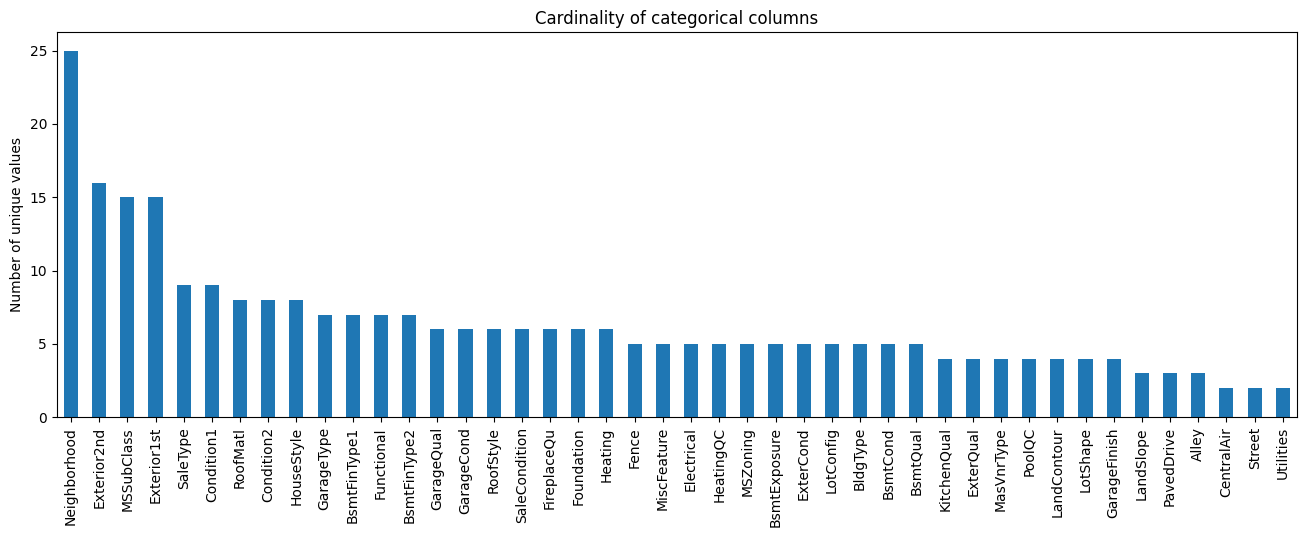

In [43]:
train_df[categorical_cols].nunique().sort_values(ascending = False).plot.bar(figsize = (16, 5))
plt.ylabel('Number of unique values')
plt.title('Cardinality of categorical columns')

## SalePrice distribution for categorical variables

The boxplots below show the distribution of house sale prices (SalePrice) across different categories for each categorical feature in the dataset. Each subplot represents one categorical feature, and within each plot, the boxes represent the interquartile range (IQR) of sale prices for each category.

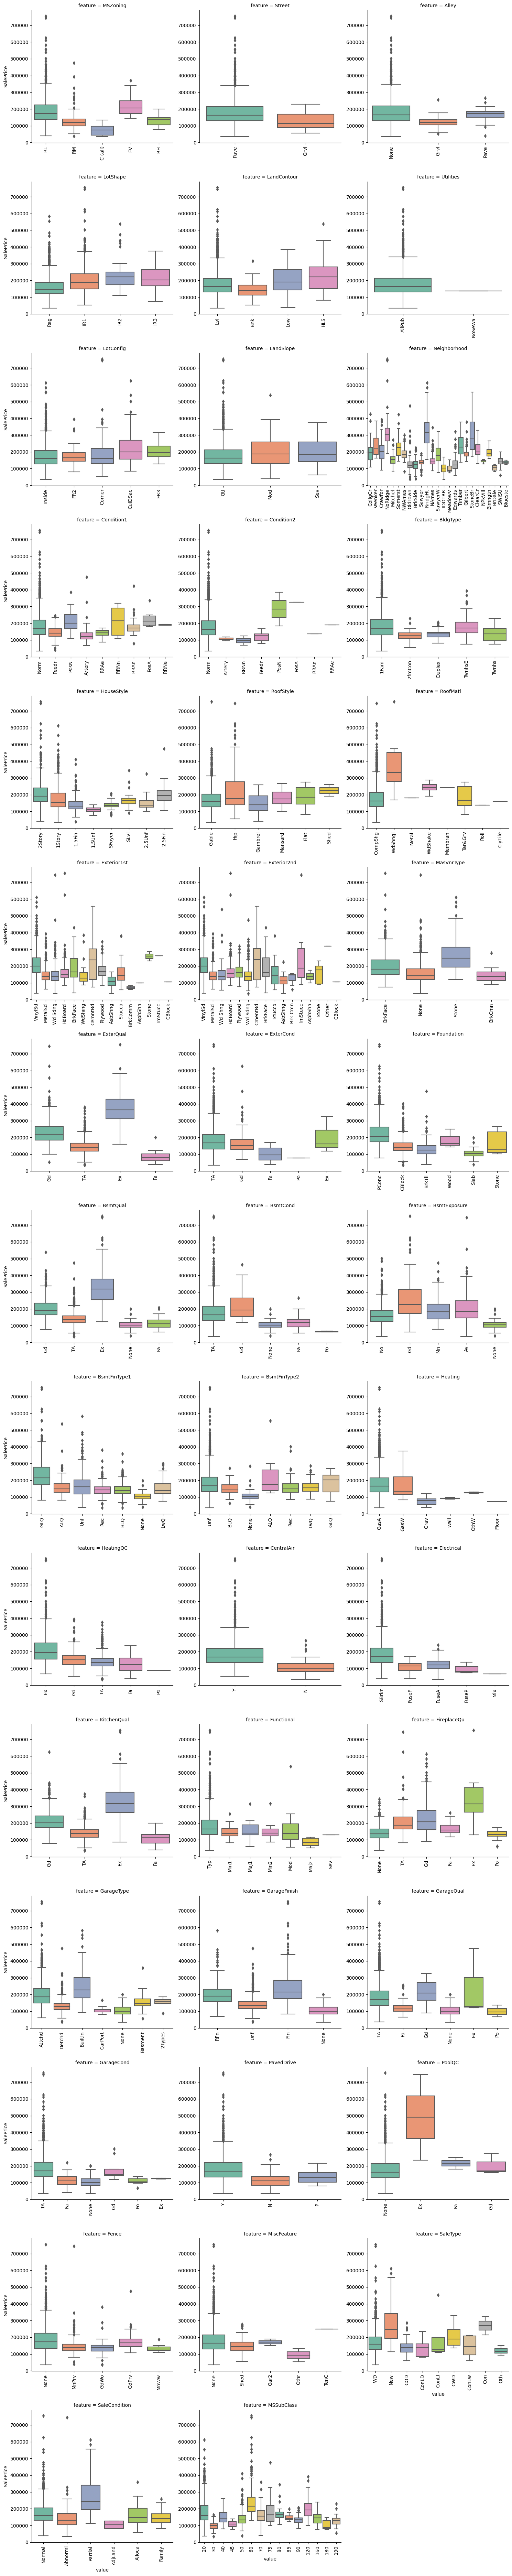

In [44]:
#transforming DataFrame into "long" format with 2 columns: feature and value
df_cat_melted = train_df[categorical_cols + ['SalePrice']].melt(id_vars='SalePrice', var_name='feature', value_name='value') #transforming DataFrame into "long" format with 2 columns: feature and value

#creating FacetGrid
g = sns.FacetGrid(df_cat_melted, col='feature', col_wrap=3, sharex=False, sharey=False, height = 5)
g.map(sns.boxplot, 'value', 'SalePrice', palette = 'Set2')
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)
g.tight_layout()
plt.show()

As seen in the plots above, Neighborhood has a significant impact on property prices, as do features related to quality (KitchenQual, BasementQual, ExterQual, PoolQC), and the material used for the roof (RoofMatl). 
The Partial category in SaleCondition also stands out compared to the other categories.

In [45]:
# ANOVA test function
def anova_test(df, target_col, categorical_columns, alpha=0.05):
    """
    Performs one-way ANOVA to test if the mean of the target variable is different across groups of categorical variables.

    Parameters:
    df: pandas DataFrame
    target_col: Target column (e.g. 'SalePrice')
    categorical_columns: List of categorical columns to test
    alpha: Significance level (default = 0.05)

    Returns:
    DataFrame with test results
    """
    results = []
    for col in categorical_columns:
        if col in df.columns:
            groups = []
            for group in df[col].dropna().unique():
                group_data = df[df[col] == group][target_col].dropna()
                if len(group_data) > 0:
                    groups.append(group_data)
            
            # Perform ANOVA only if there are at least 2 groups with data
            if len(groups) >= 2:
                f_stat, p_val = f_oneway(*groups)
                results.append({
                    'Feature': col,
                    'P-value': p_val,
                    'F-statistic': f_stat,
                    'Significant': p_val < alpha  # True if the difference is statistically significant
                })

    result_df = pd.DataFrame(results).sort_values(by='P-value').reset_index(drop=True)
    #result_df = result_df.style.format({
    #    'P-value': "{:.2e}",
    #    'F-statistic': "{:.2f}"
    #})
    return result_df

In [46]:
anova_test_results = anova_test(train_df, 'SalePrice', categorical_cols)
anova_test_results

,Feature,P-value,F-statistic,Significant
0,Neighborhood,1.558600e-225,71.784865,True
1,ExterQual,1.439551e-204,443.334831,True
2,BsmtQual,8.158548e-196,316.148635,True
3,KitchenQual,3.032213e-192,407.806352,True
4,GarageFinish,6.228747e-115,213.867028,True
5,FireplaceQu,2.971217e-107,121.075121,True
6,Foundation,5.791895e-91,100.253851,True
7,GarageType,6.117026e-87,80.379992,True
8,MSSubClass,8.662166e-79,33.732076,True
9,BsmtFinType1,2.386358e-71,64.688200,True


The ANOVA test indicates that there is no significant difference in sale price between the categories of the features Street, LandSlope, and Utilities.

# Encoding variables

Since machine learning models operate on numbers, in order to enable the model to interpret categorical data, we need to encode categorical columns.
In this particular example I decided to apply target-guided ordinal encoding, because:
- Target-guided ordinal encoding uses target variable (mean of target per category) to define the order
- can boost predictive performance because the encoding captures important patterns or correlations
- it's efficient for high cardinality (high amount of unique values per feature)
- simple to interpret (sort categories based on target mean, assign 1,2,3,...)

In [47]:
#imputing data for missing data in categorical features
mvt_impute = SimpleImputer(strategy = 'most_frequent')
elec_impute = SimpleImputer(strategy = 'most_frequent')


train_df['MasVnrType'] = mvt_impute.fit_transform(train_df['MasVnrType'].values.reshape(-1, 1)).flatten() #5 missing values replaced
train_df['Electrical'] = elec_impute.fit_transform(train_df['Electrical'].values.reshape(-1, 1)).flatten() #1 missing value replaced

In [48]:
def target_guided_ordinal_encoding(df, categorical_col, target_col):
    """
    Performs target-guided ordinal encoding 
    
    Parameters:
    df: pandas DataFrame
    categorical_col: List of categorical columns to encode
    target_col: Target column (e.g. 'SalePrice')

    Returns:
    DataFrame with encoded columns
    Encoding map
    """
    df = df.copy()
    encoding_maps = {}
    #calculating average 'SalePrice' for each column and category
    for col in categorical_col:
        ordering = df.groupby(col)[target_col].mean().sort_values()
        encoding_map = {k: i+1 for i, k in enumerate(ordering.index)}

        df[f'{col}_encoded'] = df[col].map(encoding_map)

        encoding_maps[col] = encoding_map

    return df, encoding_maps

In [49]:
df_encoded, categorical_encoding_map = target_guided_ordinal_encoding(train_df, categorical_cols, 'SalePrice')

In [50]:
df_encoded.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSZoning_encoded,Street_encoded,Alley_encoded,LotShape_encoded,LandContour_encoded,Utilities_encoded,LotConfig_encoded,LandSlope_encoded,Neighborhood_encoded,Condition1_encoded,Condition2_encoded,BldgType_encoded,HouseStyle_encoded,RoofStyle_encoded,RoofMatl_encoded,Exterior1st_encoded,Exterior2nd_encoded,MasVnrType_encoded,ExterQual_encoded,ExterCond_encoded,Foundation_encoded,BsmtQual_encoded,BsmtCond_encoded,BsmtExposure_encoded,BsmtFinType1_encoded,BsmtFinType2_encoded,Heating_encoded,HeatingQC_encoded,CentralAir_encoded,Electrical_encoded,KitchenQual_encoded,Functional_encoded,FireplaceQu_encoded,GarageType_encoded,GarageFinish_encoded,GarageQual_encoded,GarageCond_encoded,PavedDrive_encoded,PoolQC_encoded,Fence_encoded,MiscFeature_encoded,SaleType_encoded,SaleCondition_encoded,MSSubClass_encoded
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,4,2,3,1,2,2,1,1,17,5,5,5,7,2,3,12,13,3,3,4,6,4,4,2,7,6,6,5,2,5,3,7,2,6,3,4,6,3,1,5,4,5,5,15
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,4,2,3,1,2,2,2,1,21,3,5,5,6,2,3,5,6,2,2,4,3,4,4,5,5,6,6,5,2,5,2,7,4,6,3,4,6,3,1,5,4,5,5,12
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,4,2,3,2,2,2,1,1,17,5,5,5,7,2,3,12,13,3,3,4,6,4,4,3,7,6,6,5,2,5,3,7,4,6,3,4,6,3,1,5,4,5,5,15
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,4,2,3,2,2,2,3,1,18,5,5,5,7,2,3,6,9,2,2,4,2,3,5,2,5,6,6,4,2,5,3,7,5,3,2,4,6,3,1,5,4,5,2,10
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,4,2,3,2,2,2,2,1,25,5,5,5,7,2,3,12,13,3,3,4,6,4,4,4,7,6,6,5,2,5,3,7,4,6,3,4,6,3,1,5,4,5,5,15


CentralAir feature is binary, so I am applying binary encoding instead of target-guided ordinal encoding here.

In [51]:
df_encoded['CentralAir_encoded'] = (df_encoded['CentralAir'] == 'Y').astype(int)

In [52]:
df_encoded.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSZoning_encoded,Street_encoded,Alley_encoded,LotShape_encoded,LandContour_encoded,Utilities_encoded,LotConfig_encoded,LandSlope_encoded,Neighborhood_encoded,Condition1_encoded,Condition2_encoded,BldgType_encoded,HouseStyle_encoded,RoofStyle_encoded,RoofMatl_encoded,Exterior1st_encoded,Exterior2nd_encoded,MasVnrType_encoded,ExterQual_encoded,ExterCond_encoded,Foundation_encoded,BsmtQual_encoded,BsmtCond_encoded,BsmtExposure_encoded,BsmtFinType1_encoded,BsmtFinType2_encoded,Heating_encoded,HeatingQC_encoded,CentralAir_encoded,Electrical_encoded,KitchenQual_encoded,Functional_encoded,FireplaceQu_encoded,GarageType_encoded,GarageFinish_encoded,GarageQual_encoded,GarageCond_encoded,PavedDrive_encoded,PoolQC_encoded,Fence_encoded,MiscFeature_encoded,SaleType_encoded,SaleCondition_encoded,MSSubClass_encoded
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,4,2,3,1,2,2,1,1,17,5,5,5,7,2,3,12,13,3,3,4,6,4,4,2,7,6,6,5,1,5,3,7,2,6,3,4,6,3,1,5,4,5,5,15
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,4,2,3,1,2,2,2,1,21,3,5,5,6,2,3,5,6,2,2,4,3,4,4,5,5,6,6,5,1,5,2,7,4,6,3,4,6,3,1,5,4,5,5,12
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,4,2,3,2,2,2,1,1,17,5,5,5,7,2,3,12,13,3,3,4,6,4,4,3,7,6,6,5,1,5,3,7,4,6,3,4,6,3,1,5,4,5,5,15
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,4,2,3,2,2,2,3,1,18,5,5,5,7,2,3,6,9,2,2,4,2,3,5,2,5,6,6,4,1,5,3,7,5,3,2,4,6,3,1,5,4,5,2,10
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,4,2,3,2,2,2,2,1,25,5,5,5,7,2,3,12,13,3,3,4,6,4,4,4,7,6,6,5,1,5,3,7,4,6,3,4,6,3,1,5,4,5,5,15


Now we have all categorical columns encoded, so we can drop original categorical columns.

In [53]:
df_encoded.drop(columns = categorical_cols, inplace = True)

# Correlation

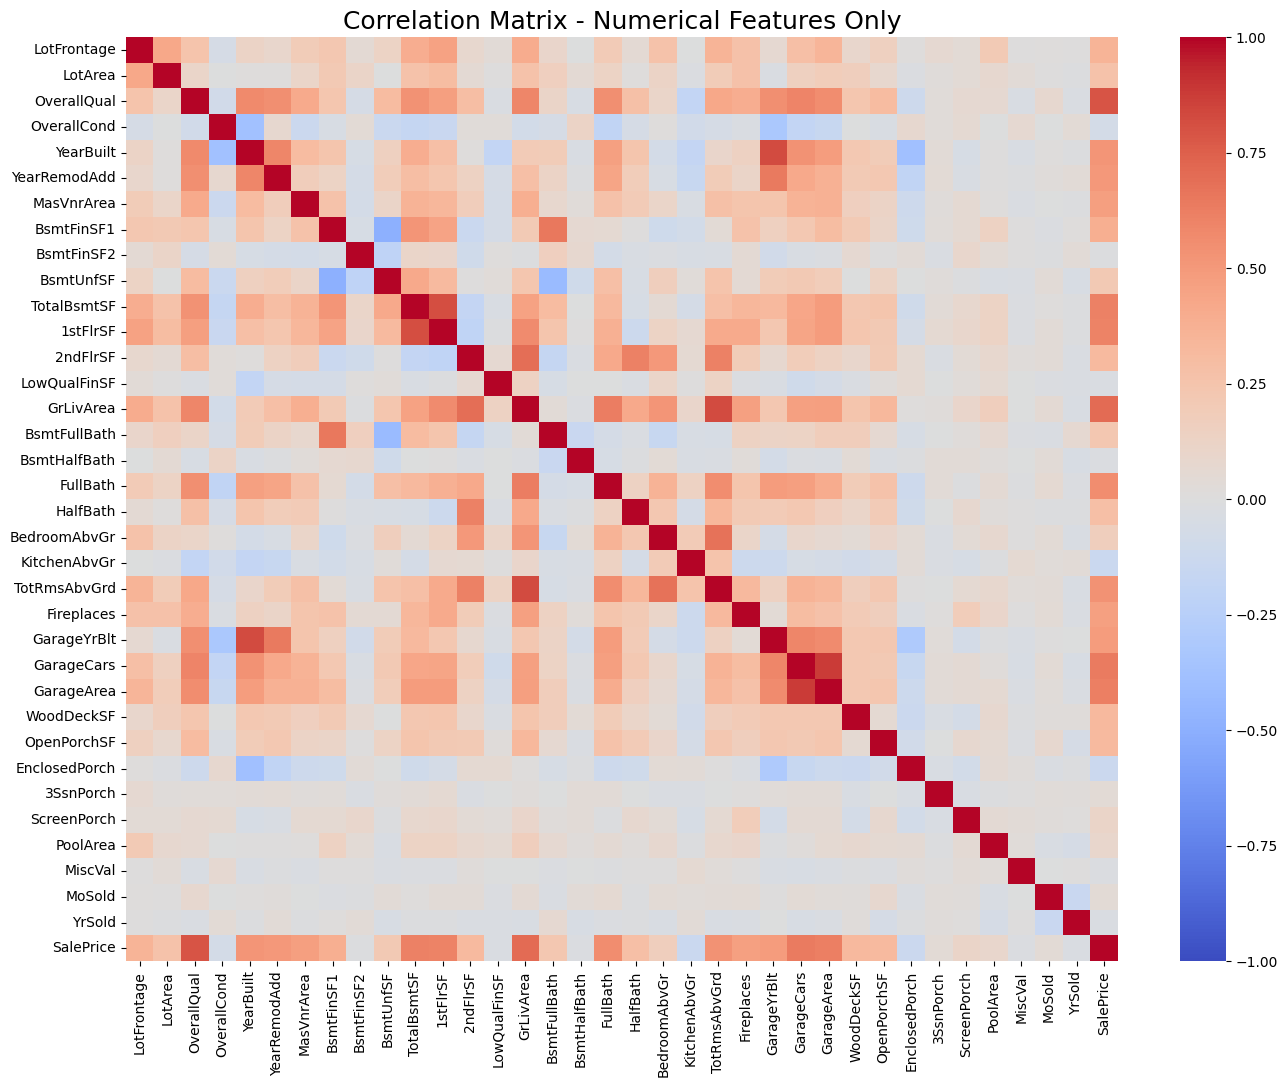

In [54]:
corr_matrix_num = df_encoded[numerical_cols+['SalePrice']].corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix_num, annot = False, cmap = 'coolwarm', center = 0, vmin = -1, vmax = 1)
plt.title('Correlation Matrix - Numerical Features Only', fontsize=18)
plt.show()

We can see that GarageYrBlt strongly correlates with YearBuilt, which seems reasonable, since most garages were built along with houses. Also, GarageCars strongly correlates with GarageArea.
GrLivArea (Above grade (ground) living area square feet) correlates with TotRmsAbvGrd (Total rooms above grade w/o bathrooms), intuitively, more space comes with more rooms.
Looks like some garages were built during house remodelling, as YearRemodAdd correlates with GarageYrBlt.

The continuous numeric variables most strongly correlated with the target are: TotalBsmtSF, GrLivArea and GarageArea

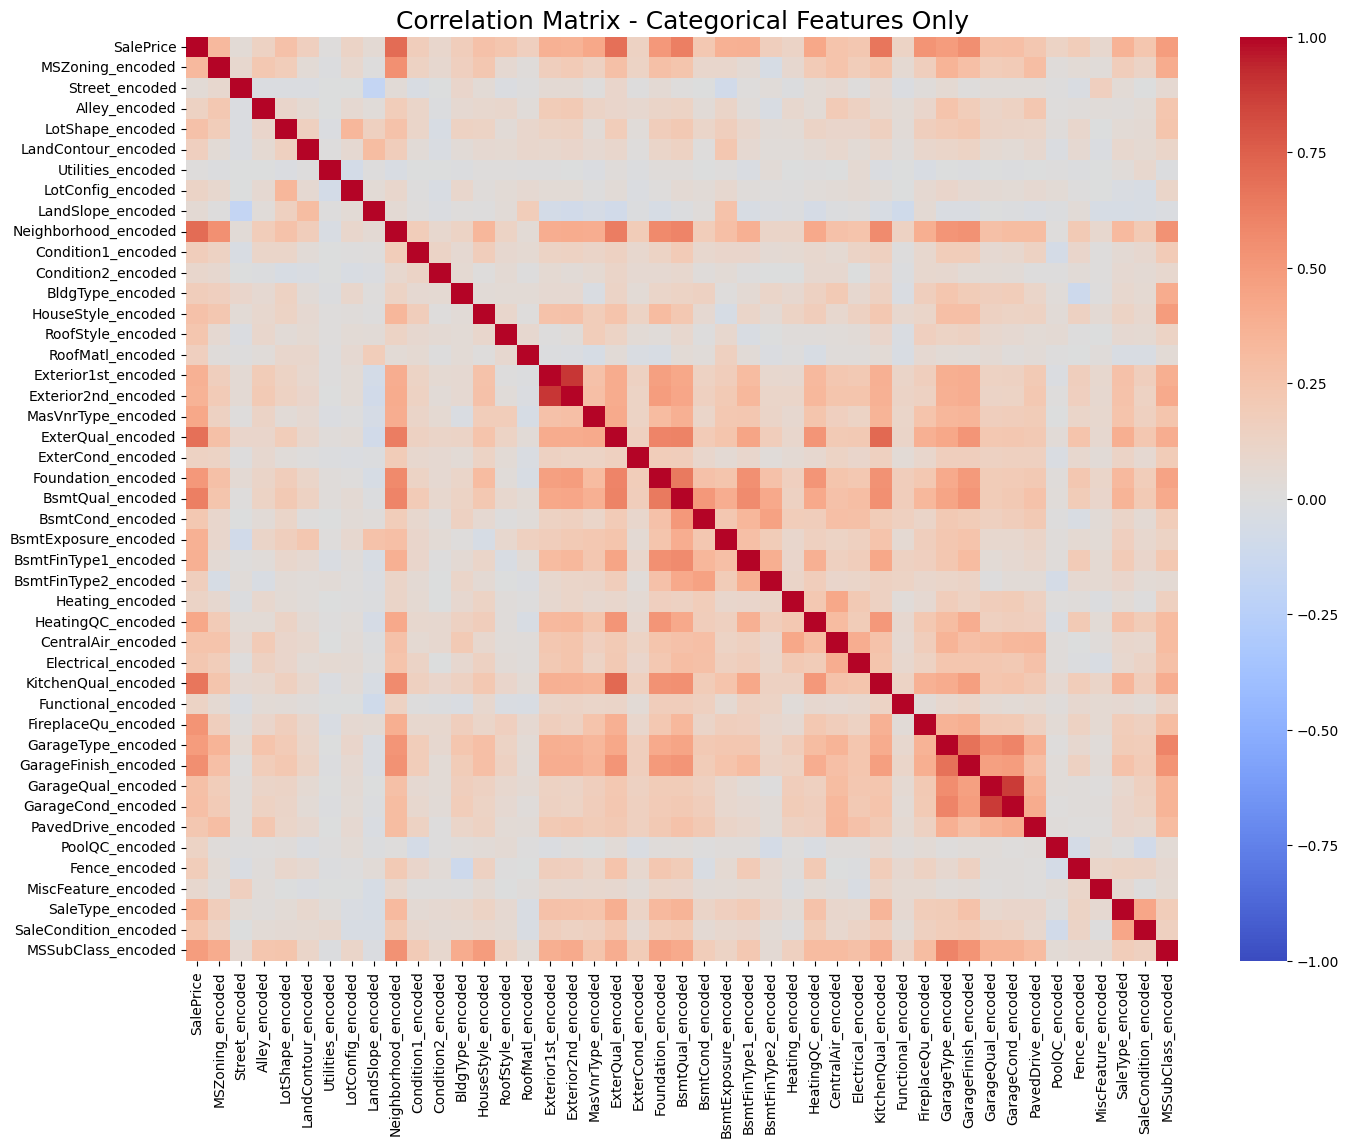

In [55]:
corr_matrix_cat = df_encoded.drop(columns = numerical_cols).corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix_cat, annot = False, cmap = 'coolwarm', center = 0, vmin = -1, vmax = 1)
plt.title('Correlation Matrix - Categorical Features Only', fontsize=18)
plt.show()

Exterior1st and Exterior2nd have strong correlation, as well as GarageQual and GarageCond. KitchenQual is correlated with ExterQual.

SalePrice is most correlated with Neighborhood, ExterQual and KitchenQual.

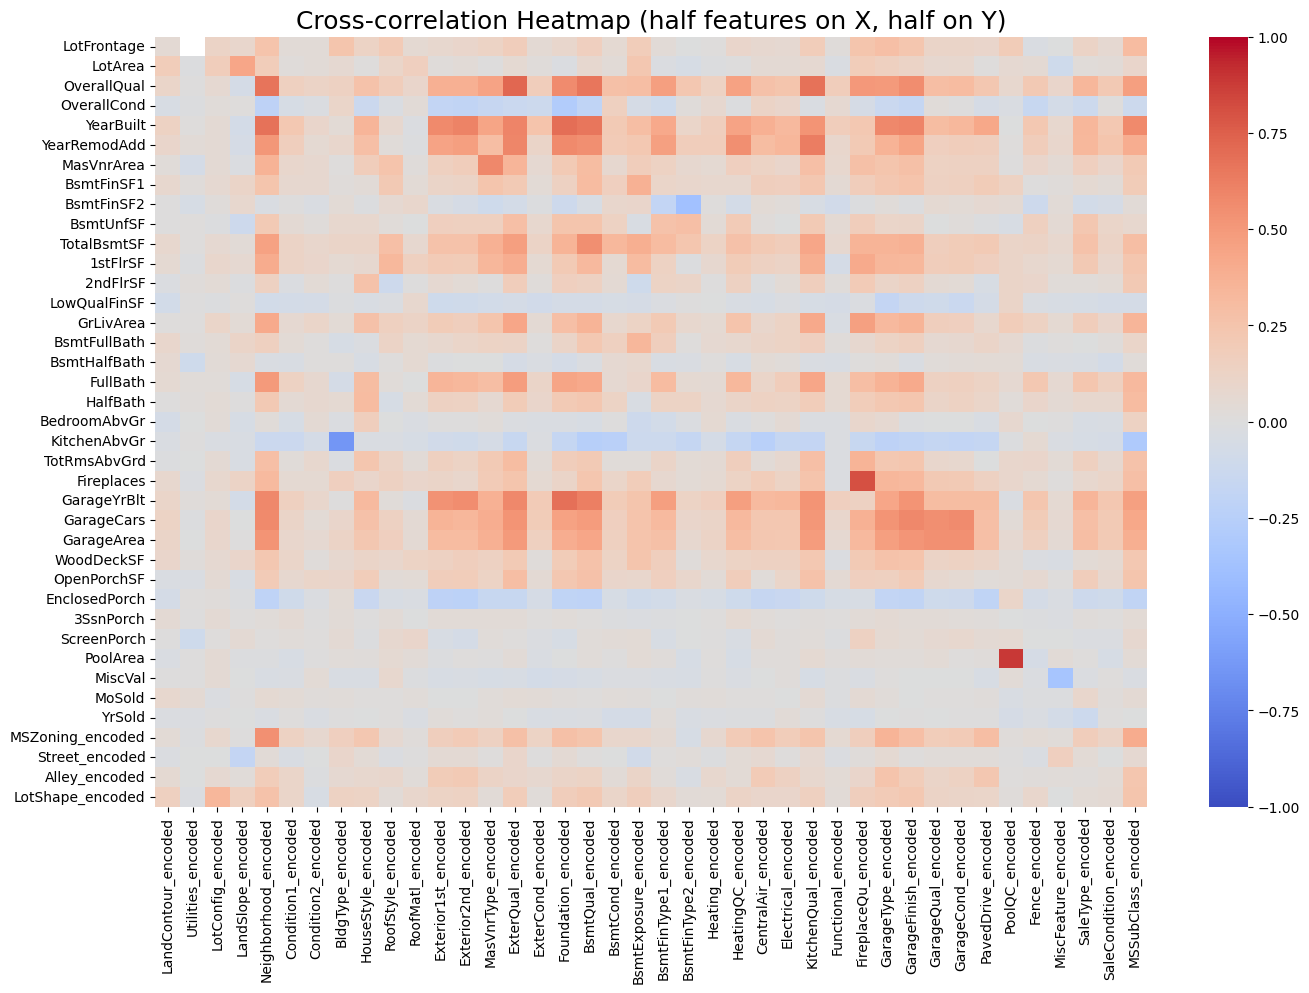

In [56]:
all_cols = df_encoded.drop(columns = ['SalePrice']).columns.tolist()

#split into two groups
half = len(all_cols) // 2
features_y = all_cols[:half]
features_x = all_cols[half:]

#correlation matrix with half of the features on X-axis, and the other half on Y-axis
corr_matrix_all = df_encoded[features_y + features_x].corr().loc[features_y, features_x]

plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix_all, annot = False, cmap = 'coolwarm', center = 0, vmin = -1, vmax = 1)
plt.title('Cross-correlation Heatmap (half features on X, half on Y)', fontsize=18)
plt.show()

OverallQual is correlated with Neighborhood, ExterQual and KitchenQual.
YearBuilt is correlated with Neighborhood, Foundation and BsmtQual.
Fireplaces has strong correlation with FireplaceQu, and PoolArea has strong correlation with PoolQC.
KitchenAbvGrd is negatively correlated with BldgType.

Let's check the relationship between SalePrice and its most correlated numeric values 

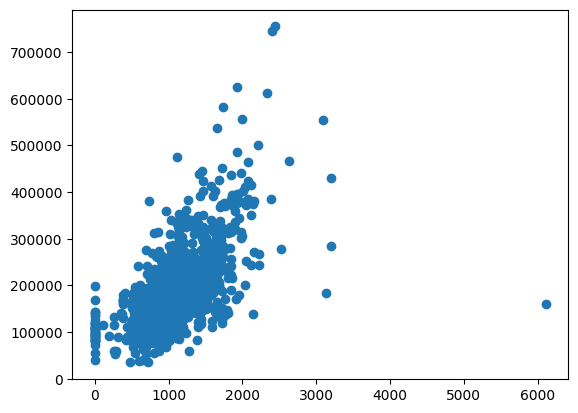

In [57]:
plt.scatter(df_encoded['TotalBsmtSF'], df_encoded['SalePrice'])

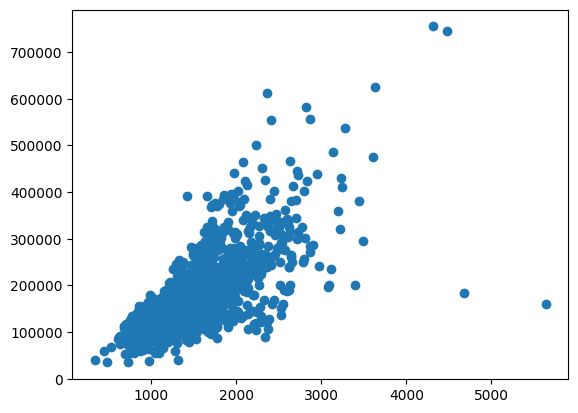

In [58]:
plt.scatter(df_encoded['GrLivArea'], df_encoded['SalePrice'])

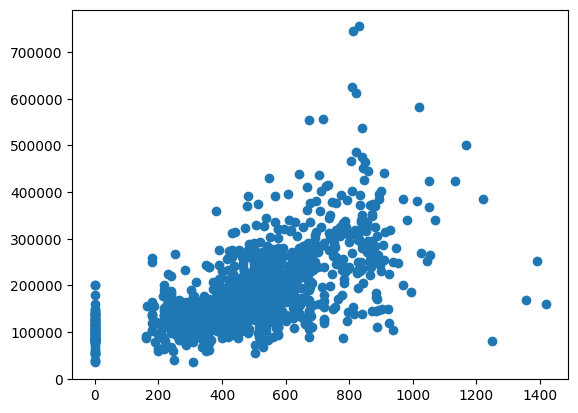

In [59]:
plt.scatter(df_encoded['GarageArea'], df_encoded['SalePrice'])

The original plots showed a cone-shaped pattern, pointing to heteroscedasticity. Let's check what the graphs will look like after applying the logarithmic transformation.

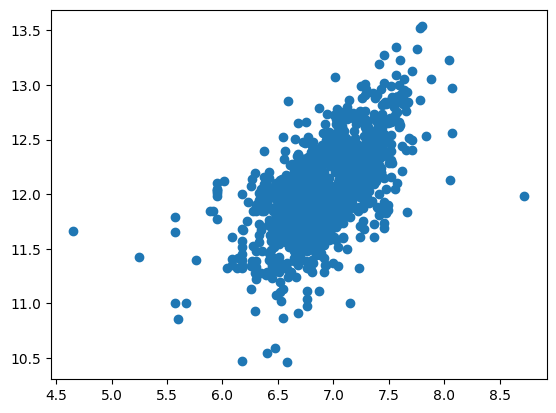

In [60]:
x = np.log(df_encoded['TotalBsmtSF'])
y = np.log(df_encoded['SalePrice'])

plt.scatter(x, y)

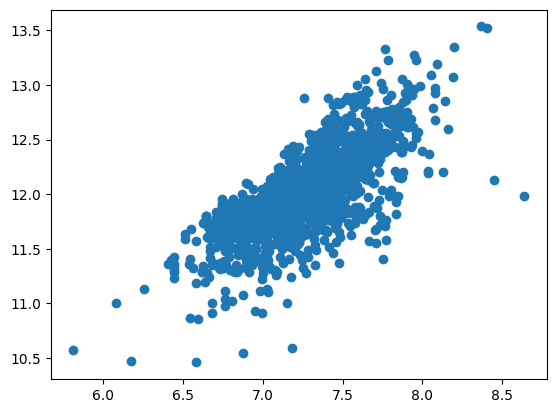

In [61]:
x = np.log(df_encoded['GrLivArea'])
y = np.log(df_encoded['SalePrice'])

plt.scatter(x, y)

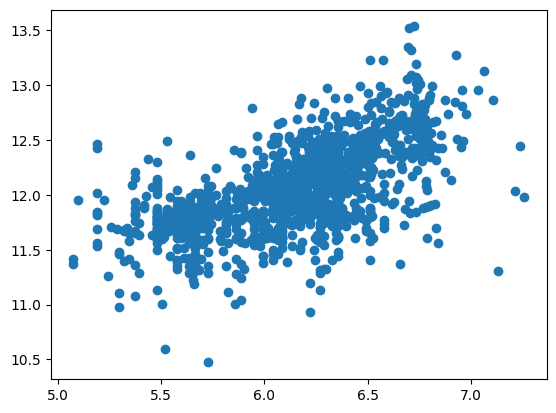

In [62]:
x = np.log(df_encoded['GarageArea'])
y = np.log(df_encoded['SalePrice'])

plt.scatter(x, y)

After log transformation, this cone-shaped pattern diminished, indicating more constant variance across fitted values.

# Feature Engineering

Some feature engineering such as encoding categorical columns, or handling missing data (not truly missing data according to data description) have already been done in earlier stages.

## New features

In [63]:
df_encoded['Age'] = df_encoded['YrSold'] - df_encoded['YearBuilt']
df_encoded['RemodAge'] = df_encoded['YrSold'] - df_encoded['YearRemodAdd']
df_encoded['HasGarage'] = (train_df['GarageType'] != 'None').astype(int)
df_encoded['HasBasement'] = (train_df['TotalBsmtSF'] > 0).astype(int)
df_encoded['UnfBsmtPercent'] = np.where(df_encoded['TotalBsmtSF'] != 0, df_encoded['BsmtUnfSF'] / df_encoded['TotalBsmtSF'], 0)
df_encoded['LivLotRatio'] = df_encoded['GrLivArea'] / df_encoded['LotArea']
df_encoded['AreaPerRoom'] = (df_encoded['1stFlrSF'] + df_encoded['2ndFlrSF'])  / df_encoded['TotRmsAbvGrd']

## Handling remaining missing values

In [64]:
lf_impute = SimpleImputer(strategy = 'mean')

df_encoded['LotFrontage'] = lf_impute.fit_transform(df_encoded['LotFrontage'].values.reshape(-1, 1))
df_encoded['GarageYrBlt'] = df_encoded['GarageYrBlt'].fillna(-1)


## Train test split

In [65]:
#train test split
X = df_encoded.drop(columns = 'SalePrice')
y = np.log1p(df_encoded['SalePrice'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)

## Feature Scaling

In [66]:
cols_to_scale = numerical_cols + ['Age', 'RemodAge', 'LivLotRatio', 'AreaPerRoom']
scaler = ColumnTransformer(
    transformers=[('minmax', MinMaxScaler(), cols_to_scale)
                 ],
    remainder='passthrough'
)

remaining_cols = [col for col in df_encoded.columns if col not in cols_to_scale]
feature_names = cols_to_scale + remaining_cols
feature_names.remove('SalePrice')

X_train_scaled_array = scaler.fit_transform(X_train)
X_test_scaled_array = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled_array, columns=feature_names, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled_array, columns=feature_names, index=X_test.index)


X_train_scaled = X_train_scaled[X_train.columns]
X_test_scaled = X_test_scaled[X_test.columns]

In [67]:
#base model
lr = LinearRegression()

#training
lr.fit(X_train_scaled, y_train)

#prediction
y_pred = lr.predict(X_test_scaled)

#metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

RMSE: 0.1291
R²: 0.9107


In [68]:
#feature selection

In [69]:
#other models

In [70]:
#model evaluation